In [133]:
import pandas as pd

In [134]:
df=pd.read_csv('vec_data.csv')

In [135]:
#How many different companies are represented in the data set?
no_of_companies=df['Company Name'].nunique()
print(no_of_companies)

439


In [136]:
#What is the total number of jobs created for businesses in Queens?
df.groupby('Borough').sum()['Job created']['Queens']


102.0

In [137]:
#How many different unique email domains names are there in the data set?
df['company email'].dropna().apply(lambda x: x.split('@')[-1]).nunique()


361

In [138]:
#Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
df3=pd.DataFrame(df['NTA'].value_counts())
df2=df.set_index('NTA')
df2['lb']=df3
out1=pd.DataFrame(df2[df2['lb']>=5].groupby('NTA').sum()['Job created'])
out2=pd.DataFrame(df2[df2['lb']>=5].groupby('NTA').mean()['Total Savings']) #average total savings
out2.rename(columns={'Total Savings': 'Average Total Savings'}, inplace=True)

In [140]:
out3=pd.concat([out1,out2],axis=1)
out1.to_csv('out1')
out2.to_csv('out2')

[Text(0, 0.5, 'Log of average total savings')]

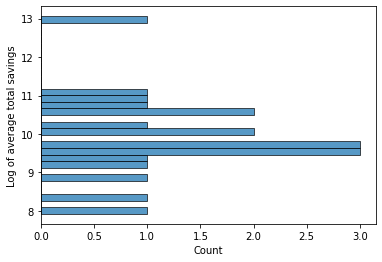

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
logdata=np.log(out2)
logdata.rename(columns={'Average Total Savings': 'Log of average total savings'},inplace=True)
import seaborn as sns
sns.histplot(logdata,y='Log of average total savings',bins=30).set(ylabel="Log of average total savings")
#sns.countplot(out2).set(ylabel="Log of average total savings")


In [142]:
logdata

,Log of average total savings
NTA,
Battery Park City-Lower Manhattan,13.060256
Bushwick South,10.171239
Carroll Gardens-Columbia Street-Red Hook,10.099769
College Point,9.750300
Crown Heights North,8.303083
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,11.001272
East New York,10.787939
East Williamsburg,9.546143
Greenpoint,9.185397


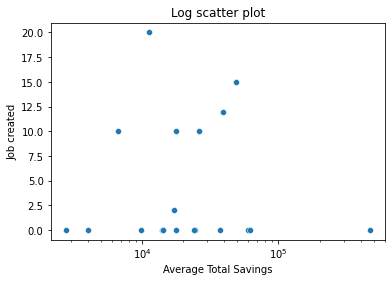

In [143]:
s3=sns.scatterplot(data=out3, y='Job created', x='Average Total Savings',legend='full').set(xscale="log",title="Log scatter plot",xlabel='Average Total Savings')



[Text(0.5, 0, 'Average Total Savings'), Text(0.5, 1.0, 'Non-Log scatter plot')]

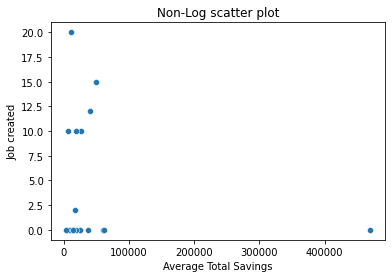

In [144]:
sns.scatterplot(data=out3, y='Job created', x='Average Total Savings',legend='full').set(title='Non-Log scatter plot',xlabel='Average Total Savings')

Text(0.5, 1.0, 'Job created by year')

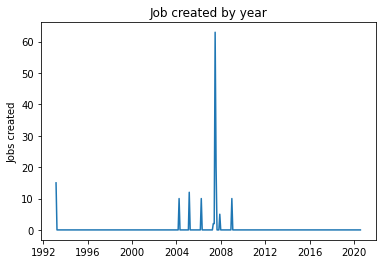

In [145]:
df['Effective Date']=pd.to_datetime(df['Effective Date'],format='%m/%d/%Y')
df.set_index("Effective Date",inplace=True)
monthly_resampled_data = df['Job created'].resample('M')
plt.plot(monthly_resampled_data.sum())
plt.ylabel('Jobs created')
plt.title('Job created by year')

Text(0.5, 1.0, 'Jobs created by month')

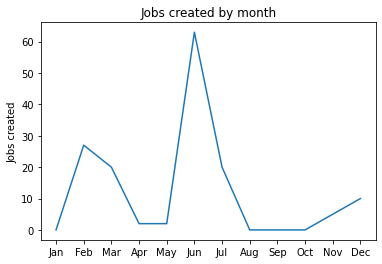

In [149]:
df=pd.read_csv('vec_data.csv')
df['Month']=df['Effective Date'].apply(lambda x: x.split('/')[0])
df2=df.groupby('Month')['Job created'].sum()
plt.plot(df2.rename(index={'01': 'Jan','02':'Feb', '03':'Mar', '04':'Apr', '05': 'May', '06':'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}))
plt.ylabel('Jobs created')
plt.title('Jobs created by month')